####  Perceptron  
- 인공신경망의 가장 기본적인 단위로, 뇌의 뉴런을 모방한 모델입니다. 즉, 입력값을 받아서 가중치를 곱한 뒤, 그 결과를 더해서 활성화 함수를 통과시켜 출력을 내는 구조입니다.  
| 요소                         | 설명                                        |
| -------------------------- | ----------------------------------------- |
| 입력값 $x_1, x_2, \dots, x_n$ | 모델에 들어가는 값                                |
| 가중치 $w_1, w_2, \dots, w_n$ | 각 입력에 곱해지는 값                              |
| 편향 $b$                     | 출력값을 조정하는 상수                              |
| 가중합 $z$                    | $z = \sum w_i x_i + b$                    |
| 활성화 함수                     | 결과를 이진 출력으로 변환 (예: Step, Sigmoid, ReLU 등) |
  
- 예시  
```
입력:     x1 = 1, x2 = 0  
가중치:   w1 = 0.5, w2 = -0.6  
편향:     b = 0.1  
가중합:   z = (1 * 0.5) + (0 * -0.6) + 0.1 = 0.6  

출력:     활성화 함수 적용 → z > 0 → 출력 1
```
- 한계  
  - 선형적으로 분리 가능한 문제만 해결 가능   
  - XOR 문제처럼 비선형 문제는 처리 불가 

In [41]:
import numpy as np

class Perceptron(object):
  
  # 가중치 생성
  def  __init__(self, input_size): 
    self.weights = np.random.rand(input_size)  
  
  # 활성함수, input 들어온 것들의 합이 0 이상이면 1, 아니면 0을 출력    
  def activation_function(self, inp):
    print("np.sum(inp) : ", np.sum(inp))
    if np.sum(inp) >= 0:
      return 1
    else:
      return 0

  # 가중치와 input을 곱해 activation function의 파라미터 사용해 결과를 출력. 입력값을 통해 예측하는 함수.
  def forward_pass(self, inputs):
    print("np.multiply(inputs, self.weights) : ", np.multiply(inputs, self.weights))
    return self.activation_function(np.multiply(inputs, self.weights))

  # labels 값과 같으면 패, 0과 같으면 가중치에 feature 값을 더하고, 1과 같으면 가중치에서 feature 값을 빼는 함수.
  def fit(self, features, labels):
    if self.forward_pass(features) == labels:
      pass
    elif self.forward_pass(features) == 0:
      self.weights = self.weights + features
    elif self.forward_pass(features) == 1:
      self.weights = self.weights - features
    print("new self.weights : ", self.weights)

In [43]:
model = Perceptron(4)

print(model.weights)
features = np.array([2,5,-4,-3])
label = 0

print('first output   :', model.forward_pass(features))
model.fit(features, label)
print('after learning :',model.forward_pass(features))

[0.86151947 0.43290597 0.97576204 0.53414993]
np.multiply(inputs, self.weights) :  [ 1.72303894  2.16452984 -3.90304817 -1.60244979]
np.sum(inp) :  -1.6179291842852987
first output   : 0
np.multiply(inputs, self.weights) :  [ 1.72303894  2.16452984 -3.90304817 -1.60244979]
np.sum(inp) :  -1.6179291842852987
new self.weights :  [0.86151947 0.43290597 0.97576204 0.53414993]
np.multiply(inputs, self.weights) :  [ 1.72303894  2.16452984 -3.90304817 -1.60244979]
np.sum(inp) :  -1.6179291842852987
after learning : 0


In [45]:
model.weights

array([0.86151947, 0.43290597, 0.97576204, 0.53414993])

In [49]:
ins = np.array([-2,5,-4,3])
outs = 1

my_perc = Perceptron(4)

print("my_perc.weights : ", my_perc.weights)

print(my_perc.forward_pass(ins))
my_perc.fit(ins, outs)
print(my_perc.forward_pass(ins))

my_perc.weights :  [0.26776819 0.57530257 0.57097767 0.32526082]
np.multiply(inputs, self.weights) :  [-0.53553637  2.87651283 -2.28391068  0.97578246]
np.sum(inp) :  1.032848238071183
1
np.multiply(inputs, self.weights) :  [-0.53553637  2.87651283 -2.28391068  0.97578246]
np.sum(inp) :  1.032848238071183
new self.weights :  [0.26776819 0.57530257 0.57097767 0.32526082]
np.multiply(inputs, self.weights) :  [-0.53553637  2.87651283 -2.28391068  0.97578246]
np.sum(inp) :  1.032848238071183
1


In [51]:
my_perc.weights

array([0.26776819, 0.57530257, 0.57097767, 0.32526082])

### What is happening here?
So apparently the simple ```fit()``` function is able to find the correct set of weights to give the right answer. It turns out that if that set of weights exists, it will be able to find it every time. But for most problems, there is no such set of weights. We will explore this later in the lecture!

### Perceptron from SKlearn

아래 코드는 petal length, petal width를 가지고 Iris setosa인지 아닌지 판별하는 코드이다. iris.target == 0이면 setosa 이므로 결과값이 0 또는 1로 나오게 된다. Perceptron에 X, y를 fit 시켜서 predict 하는 과정을 담고 있다. 

In [76]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int32)  # Iris setosa이면 1, 아니면 0

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [82]:
print(per_clf.coef_)
print(per_clf.intercept_)

[[-0.7 -1.2]]
[2.]


In [85]:
y_pred

array([0], dtype=int32)

이 코드는 Scikit-learn의 Perceptron 모델을 시각화하여 결정 경계(Decision Boundary) 를 그리는 것이다.

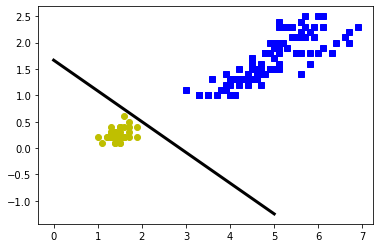

In [ ]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)

## Perceptron과 Iris 데이터 예시 설명

### 데이터 예시

Iris 데이터셋에서 두 개의 속성만 사용합니다:

- **꽃잎 길이 (x축)**
- **꽃잎 너비 (y축)**

| 꽃잎 길이 | 꽃잎 너비 | 클래스       |
|-----------|------------|---------------|
| 1.4       | 0.2        | Setosa        |
| 4.5       | 1.5        | Not Setosa    |
| 1.3       | 0.3        | Setosa        |
| 4.8       | 1.8        | Not Setosa    |

### 목표
이 두 속성만 보고 **"이 꽃이 Setosa인가?"** 를 예측하는 모델을 만드는 것.

### Perceptron 학습 후 나오는 수식

퍼셉트론은 데이터를 분류하기 위해 다음과 같은 직선 식을 찾습니다:
`w₁·x₁ + w₂·x₂ + b = 0`

여기서:
- `x₁`: 꽃잎 길이  
- `x₂`: 꽃잎 너비  
- `w₁`, `w₂`: 학습된 가중치  
- `b`: 절편(intercept)

이 식을 변형하면 실제로 직선의 형태가 됩니다:
`x₂ = -(w₁/w₂)·x₁ - b/w₂`

즉, `y = ax + b` 형태의 선이에요.
- `a = -w₁/w₂`: 기울기  
- `b = -b/w₂`: y절편

### 시각적으로 보면
```
^ y축 (꽃잎 너비)
|          o  o   (Setosa)
|      o
|             x   x   (Not Setosa)
|____|____|____|____|____|____> x축 (꽃잎 길이)
```

"o" 는 Setosa (노란 동그라미), "x" 는 Not Setosa (파란 네모), 이 데이터를 구분하는 직선이 모델이 학습한 결정 경계입니다.

### 코드 설명 
```
# 위에서 설명한 직선의 기울기와 절편을 계산합니다.
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

#x축에서 0부터 5까지의 구간에서, 각각의 x에 대해 𝑦=𝑎𝑥+𝑏 계산해서 두 점을 찍고, 그걸 연결해서 직선을 그림.
plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
```
